In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [2]:
DATADIR = "data"
CATEGORIES = ["Rotating", "Not_Rotating"]
dataset = []
img_size = (256, 256)
for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
				new_array = cv2.resize(img_array, img_size)
				dataset.append([new_array, class_num])
			except Exception as e:
				pass

In [3]:
X = [] #features
Y = [] #labels

for features, label in dataset:
	X.append(features)
	Y.append(label)
    
X = np.array(X).reshape(-1, img_size[0]*img_size[1]*3)
Y = np.array(Y).reshape(-1,)
X = (X)/255

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)


In [5]:

clf = LogisticRegression().fit(X_train, Y_train)

print("train accuracy: {} %".format(clf.score(X_train, Y_train)*100))
print("test accuracy: {} %".format(clf.score(X_test, Y_test)*100))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy: 100.0 %
test accuracy: 93.0 %


In [6]:
Y_te = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_te)
accuracy_percentage = 100 * accuracy
print("accuracy_percentage =", accuracy_percentage,"%\n")

print(classification_report(Y_test, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["Rotating", "Not_Rotating"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

accuracy_percentage = 93.0 %

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.91      0.96      0.94        55

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



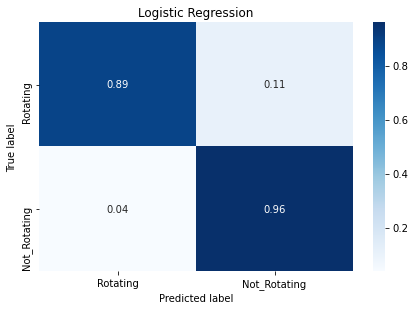

In [19]:
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
train_acc_per_fold = []
test_acc_per_fold = []

kfold = KFold(n_splits = 4, shuffle=True)
fold_no = 1
for train, test in kfold.split(X, Y):
    clf = LogisticRegression().fit(X[train], Y[train])
    train_acc = clf.score(X[train], Y[train])*100
    test_acc = clf.score(X[test], Y[test])*100
    print("train accuracy in fold {} : {} %".format(fold_no, train_acc))
    print("test accuracy in fold {} : {} %".format(fold_no, test_acc))
    fold_no = fold_no + 1
    train_acc_per_fold.append(train_acc)
    test_acc_per_fold.append(test_acc)
    
print(f'> Overall Train Accuracy: {np.mean(train_acc_per_fold)} (+- {np.std(train_acc_per_fold)})')
print(f'> Overall Test Accuracy: {np.mean(test_acc_per_fold)} (+- {np.std(test_acc_per_fold)})')

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy in fold 1 : 100.0 %
test accuracy in fold 1 : 93.0 %


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy in fold 2 : 100.0 %
test accuracy in fold 2 : 83.0 %


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy in fold 3 : 100.0 %
test accuracy in fold 3 : 93.0 %


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy in fold 4 : 100.0 %
test accuracy in fold 4 : 91.0 %
> Overall Train Accuracy: 100.0 (+- 0.0)
> Overall Test Accuracy: 90.0 (+- 4.123105625617661)
